# **Proyecto Final**

In [22]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from pathlib import Path
import os
import cv2 as cv
import pandas as pd
import tempfile
# import matplotlib as plt

In [24]:
datasetPath='content'
if not os.path.exists(datasetPath):
    os.mkdir(datasetPath)
outputPath=os.path.join(datasetPath, 'papila.zip')
tempFolderName='PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0'


baseImagesPath=os.path.join(datasetPath,'PapilaDB')

In [25]:
if not os.path.exists(outputPath):
    !wget 'https://figshare.com/ndownloader/files/28454352' -O "$outputPath"

In [26]:
if not os.path.exists(baseImagesPath):
    !unzip "$outputPath"  -d "$datasetPath"
    if os.path.exists(os.path.join(datasetPath, tempFolderName)):
        os.rename(os.path.join(datasetPath, tempFolderName), os.path.join(datasetPath,'PapilaDB'))

In [27]:

from Person import Person
from Eye import Eye
from EyeImage import EyeImage
from IOP import IOP
from Refractive_Defect import Refractive_Defect
from Database import Database

## Lectura de los archivos

In [28]:

exts = ['png', 'jpg', 'bmp']
odfundusImages = []
osfundusImages = []
path = os.path.join(baseImagesPath , 'FundusImages')
for file in os.listdir(path):
    ext = file[-3:]
    if (ext in exts):
        id = int(file[3:6])
        side = file[6:8]
        im = cv.imread(os.path.join(path, file), 0)
        if side == 'OD':
            odfundusImages.append([id, file, ext, im.shape[0], im.shape[1], path])
        else:
            osfundusImages.append([id, file, ext, im.shape[0], im.shape[1], path])

odimagesWithContours = []
osimagesWithContours = []
path = os.path.join(baseImagesPath , 'ExpertsSegmentations', 'ImagesWithContours')
for file in os.listdir(path):
    ext = file[-3:]
    if (ext in exts):
        id = int(file[-9:-6])
        side = file[-6:-4]
        im = cv.imread(os.path.join(path, file), 0)
        if side == 'OD':
            odimagesWithContours.append([id, file, ext, im.shape[0], im.shape[1], path])
        else:
            osimagesWithContours.append([id, file, ext, im.shape[0], im.shape[1], path])

## Creación del objeto

Se crea el objeto Database con la dirección de los Spreadsheets y el arreglo de las ubicaciones de cada imagen y sus metadatos

In [29]:

od_path = os.path.join(baseImagesPath, 'ClinicalData', 'patient_data_od.xlsx')
os_path = os.path.join(baseImagesPath, 'ClinicalData', 'patient_data_os.xlsx')
db = Database(od_path, os_path, odfundusImages, osfundusImages, odimagesWithContours, osimagesWithContours)
db.select()

,id,age,gender,od_eye_diagnosis,od_eye_refractive_defect_dioptre_1,od_eye_refractive_defect_dioptre_2,od_eye_refractive_defect_astigmatism,od_eye_phakic_Pseudophakic,od_eye_iop_pneumatic,od_eye_iop_perkins,...,os_eye_image_with_contour_fileName,os_eye_image_with_contour_format,os_eye_image_with_contour_width,os_eye_image_with_contour_height,os_eye_image_with_contour_path,od_eye_image_with_contour_fileName,od_eye_image_with_contour_format,od_eye_image_with_contour_width,od_eye_image_with_contour_height,od_eye_image_with_contour_path
0,2,47,0,2,0.75,-1.75,90.0,0.0,21.0,NaN,...,Opht_cont_RET002OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET002OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
1,4,58,1,1,1.50,-1.75,85.0,0.0,NaN,19.0,...,Opht_cont_RET004OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET004OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
2,5,89,1,1,-0.75,-1.25,101.0,1.0,13.0,14.0,...,Opht_cont_RET005OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET005OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
3,6,69,0,2,1.00,-1.50,95.0,0.0,22.0,NaN,...,Opht_cont_RET006OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET006OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
4,7,22,1,2,-0.25,0.00,0.0,0.0,14.0,NaN,...,Opht_cont_RET007OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET007OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,289,64,0,0,0.50,-1.00,120.0,1.0,12.0,NaN,...,Opht_cont_RET289OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET289OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
240,290,75,1,0,0.25,-0.25,5.0,1.0,14.0,NaN,...,Opht_cont_RET290OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET290OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
241,291,55,0,0,1.25,-1.25,92.0,0.0,12.0,NaN,...,Opht_cont_RET291OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET291OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours
242,292,56,1,0,1.75,-1.50,73.0,0.0,10.0,NaN,...,Opht_cont_RET292OS.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours,Opht_cont_RET292OD.jpg,jpg,1934,2576,content\PapilaDB\ExpertsSegmentations\ImagesWithContours


# Demos
## Visualización

0it [00:00, ?it/s]

Person: 290
 ├─Age: 75
 ├─Gender: 1
 ├─Od Eye: 
 |   ├─Diagnosis 0
 |   ├─Refractive:
 |   |  ├─Defect Dioptre 1: 0.25
 |   |  ├─Defect Dioptre 2: -0.25
 |   |  └─Defect Astigmatism: 5.0
 |   ├─Phakic Pseudophakic: 1.0
 |   ├─IOP:
 |   |  ├─Pneumatic: 14.0
 |   |  └─Perkins: nan
 |   ├─Pachymetry: 577.0
 |   ├─Axial Length: 22.0
 |   └─VF/MD: nan
 └─Os Eye: 
     ├─Diagnosis 0
     ├─Refractive:
     |  ├─Defect Dioptre 1: 0.25
     |  ├─Defect Dioptre 2: -0.25
     |  └─Defect Astigmatism: 160.0
     ├─Phakic Pseudophakic: 1.0
     ├─IOP:
     |  ├─Pneumatic: 19.0
     |  └─Perkins: nan
     ├─Pachymetry: 573.0
     ├─Axial Length: 22.01
     └─VF/MD: nan


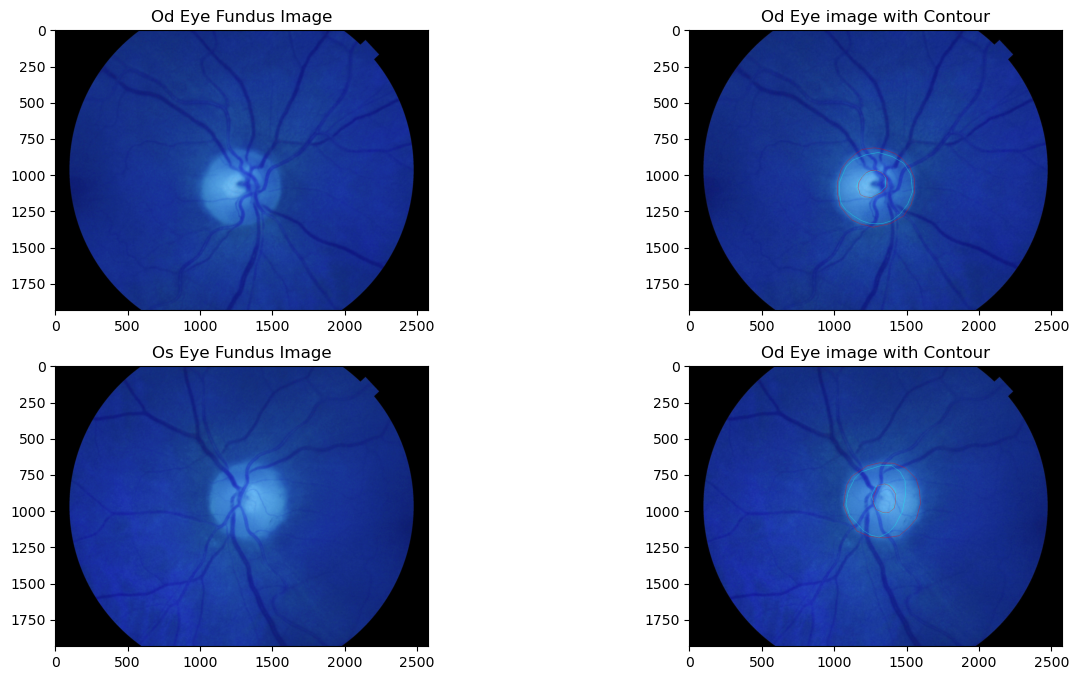

In [30]:
person = db.get(290)
if person != None:
  person.display()

## Inserción de nuevos datos
Para testing presione **Enter** en cada solicitud de ingreso de ruta de la imagen se escriban los por defecto.

In [31]:
def readIntValue(
        message = "Enter integer value", 
        validation = None, 
        error="Error trying to convert {} to integer.") -> int:
    value = -1
    valid = False
    while not valid:
        valueStr = input(message)
        try:
            value = int(valueStr)
        except:
            print(error.format(valueStr))
            continue
        if validation is None:
            valid = True
        elif validation(value):
            valid = True
        else:
            print(error.format(valueStr))
            
    return value

def readFloatValue(message = "Enter float value", 
                   validation = None, 
                   error="Error trying to convert {} to float.") -> float:
    value = -1.0
    valid = False
    while not valid:
        valueStr = input(message)
        try:
            value = float(valueStr)
        except:
            print(error.format(valueStr))
            continue
        if validation is None:
            valid = True
        elif validation(value):
            valid = True
        else:
            print(error.format(valueStr))
    return value

In [32]:
#  readIntValue(message="enter value", validation=lambda x: x > 0, error="Enter valid age")

Input Gender:
 1. Male
 2. Female
Error trying to convert 3 to integer.
---------------------
Enter data for Od Eye
Enter the diagnosis (test values diagnosis):
1. XXXX
2. YYYY
3. ZZZZ
Enter Refractive Defect:
1. Phakic or
2. Pseudophakic?
Error trying to convert 3 to integer.
Enter IOP:
---------------------
Enter data for Os1 Eye
Enter the diagnosis:
1. XXXX
2. YYYY
3. ZZZZ
Enter Refractive Defect:
1. Phakic or
2. Pseudophakic?
Error trying to convert 3 to integer.
Enter IOP:


d:\Code\mcd_proyectofinal\Database.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._datasource = self._datasource.append(item, ignore_index=True)


0it [00:00, ?it/s]

Person: 294
 ├─Age: 32
 ├─Gender: 0
 ├─Od Eye: 
 |   ├─Diagnosis 2
 |   ├─Refractive:
 |   |  ├─Defect Dioptre 1: 1.0
 |   |  ├─Defect Dioptre 2: 2.0
 |   |  └─Defect Astigmatism: 1.0
 |   ├─Phakic Pseudophakic: 1.0
 |   ├─IOP:
 |   |  ├─Pneumatic: 6.0
 |   |  └─Perkins: 5.0
 |   ├─Pachymetry: 3.0
 |   ├─Axial Length: 6.0
 |   └─VF/MD: 2.0
 └─Os Eye: 
     ├─Diagnosis None
     ├─Refractive:
     |  ├─Defect Dioptre 1: 2.0
     |  ├─Defect Dioptre 2: 3.0
     |  └─Defect Astigmatism: 6.0
     ├─Phakic Pseudophakic: 1.0
     ├─IOP:
     |  ├─Pneumatic: 3.0
     |  └─Perkins: 5.0
     ├─Pachymetry: 3.0
     ├─Axial Length: 2.0
     └─VF/MD: 3.0


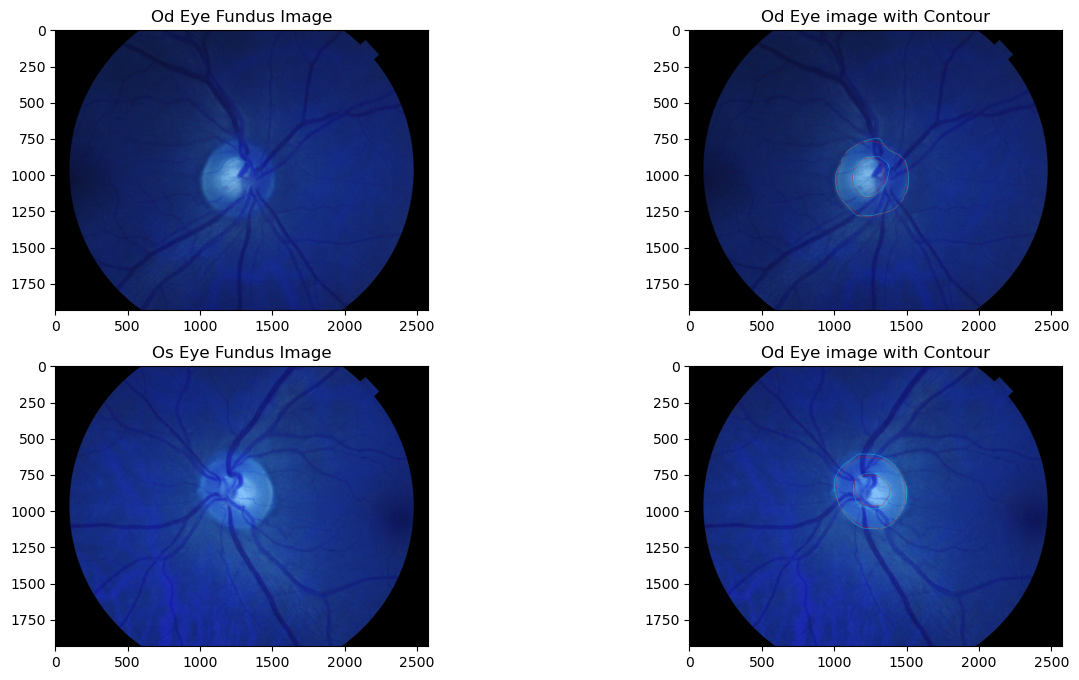

In [33]:
basePath = baseImagesPath
person = Person()
person.age = readIntValue(message="Input the age of person:", validation=lambda x : x > 0, error="Enter valid age")
print("Input Gender:")
print(" 1. Male")
print(" 2. Female")
person.gender=readIntValue(message="Choose option", validation=lambda x: x == 1 or x == 2) - 1

####### Od Eye
print('---------------------')
person.odEye = Eye()
print("Enter data for Od Eye")
print("Enter the diagnosis (test values diagnosis):")
print("1. XXXX")
print("2. YYYY")
print("3. ZZZZ")
person.odEye.diagnosis = readIntValue(message="Choose option", validation=lambda x: x in [1,2,3]) -1
print("Enter Refractive Defect:")
dioptre_1= readFloatValue(message="Enter Dioptre 1:")
dioptre_2= readFloatValue(message="Enter Dioptre 2:")
astigmatism=readIntValue(message="Enter Astigmatism:")
person.odEye.refractiveDefect = Refractive_Defect(dioptre_1, dioptre_2, astigmatism)
print("1. Phakic or" )
print("2. Pseudophakic?")
person.odEye.phakic_Pseudophakic = readIntValue(message="Choose option", validation=lambda x: x == 1 or x == 2) - 1
print("Enter IOP:")
pneumatic = readIntValue(message="Enter Pneumatic: ")
perkins = readIntValue(message="Enter Perkins: ")
person.odEye.iop = IOP(pneumatic, perkins)
person.odEye.pachymetry = readIntValue(message="Enter Pachymetry: ")
person.odEye.axialLength = readFloatValue(message="Enter Axial Length: ")
person.odEye.vf_md = readFloatValue(message="Enter VF/MD: ")
path1=(input("Enter the full path of fundus Image:") or f"{basePath}/FundusImages/RET002OD.jpg")
if (os.path.exists(path1)):
  person.odEye.fundusImage = EyeImage.fromPath(path1)
path2=(input("Enter the full path for Image with contour:") or f"{basePath}/ExpertsSegmentations/ImagesWithContours/Opht_cont_RET002OD.jpg")
if (os.path.exists(path2)):
  person.odEye.imageWithContour = EyeImage.fromPath(path2)


####### Os Eye
print('---------------------')
person.osEye = Eye()
print("Enter data for Os1 Eye")
print("Enter the diagnosis:")
print("1. XXXX")
print("2. YYYY")
print("3. ZZZZ")
person.odEye.diagnosis = readIntValue(message="Choose option", validation=lambda x: x in [1,2,3]) -1
print("Enter Refractive Defect:")
dioptre_1= readFloatValue(message="Enter Dioptre 1:")
dioptre_2= readFloatValue(message="Enter Dioptre 2:")
astigmatism=readIntValue(message="Enter Astigmatism:")
person.osEye.refractiveDefect = Refractive_Defect(dioptre_1, dioptre_2, astigmatism)
print("1. Phakic or" )
print("2. Pseudophakic?")
person.osEye.phakic_Pseudophakic = readIntValue(message="Choose option", validation=lambda x: x == 1 or x == 2) - 1
print("Enter IOP:")
pneumatic = readIntValue(message="Enter Pneumatic: ")
perkins = readIntValue(message="Enter Perkins: ")
person.osEye.iop = IOP(pneumatic, perkins)
person.osEye.pachymetry = readIntValue(message="Enter Pachymetry: ")
person.osEye.axialLength = readFloatValue(message="Enter Axial Length: ")
person.osEye.vf_md = readFloatValue(message="Enter VF/MD: ")
path3=(input("Enter the full path of fundus Image:") or f"{basePath}/FundusImages/RET002OS.jpg")
if (os.path.exists(path3)):
  person.osEye.fundusImage = EyeImage.fromPath(path3)
path4=(input("Enter the full path for Image with contour:") or f"{basePath}/ExpertsSegmentations/ImagesWithContours/Opht_cont_RET002OS.jpg")
if (os.path.exists(path4)):
  person.osEye.imageWithContour = EyeImage.fromPath(path4)

id = db.insert(person=person)

## Display the inserted data
person = db.get(id)
if person != None:
  person.display()




0it [00:00, ?it/s]

Person: 294
 ├─Age: 32
 ├─Gender: 0
 ├─Od Eye: 
 |   ├─Diagnosis 2
 |   ├─Refractive:
 |   |  ├─Defect Dioptre 1: 1.0
 |   |  ├─Defect Dioptre 2: 2.0
 |   |  └─Defect Astigmatism: 1.0
 |   ├─Phakic Pseudophakic: 1.0
 |   ├─IOP:
 |   |  ├─Pneumatic: 6.0
 |   |  └─Perkins: 5.0
 |   ├─Pachymetry: 3.0
 |   ├─Axial Length: 6.0
 |   └─VF/MD: 2.0
 └─Os Eye: 
     ├─Diagnosis None
     ├─Refractive:
     |  ├─Defect Dioptre 1: 2.0
     |  ├─Defect Dioptre 2: 3.0
     |  └─Defect Astigmatism: 6.0
     ├─Phakic Pseudophakic: 1.0
     ├─IOP:
     |  ├─Pneumatic: 3.0
     |  └─Perkins: 5.0
     ├─Pachymetry: 3.0
     ├─Axial Length: 2.0
     └─VF/MD: 3.0


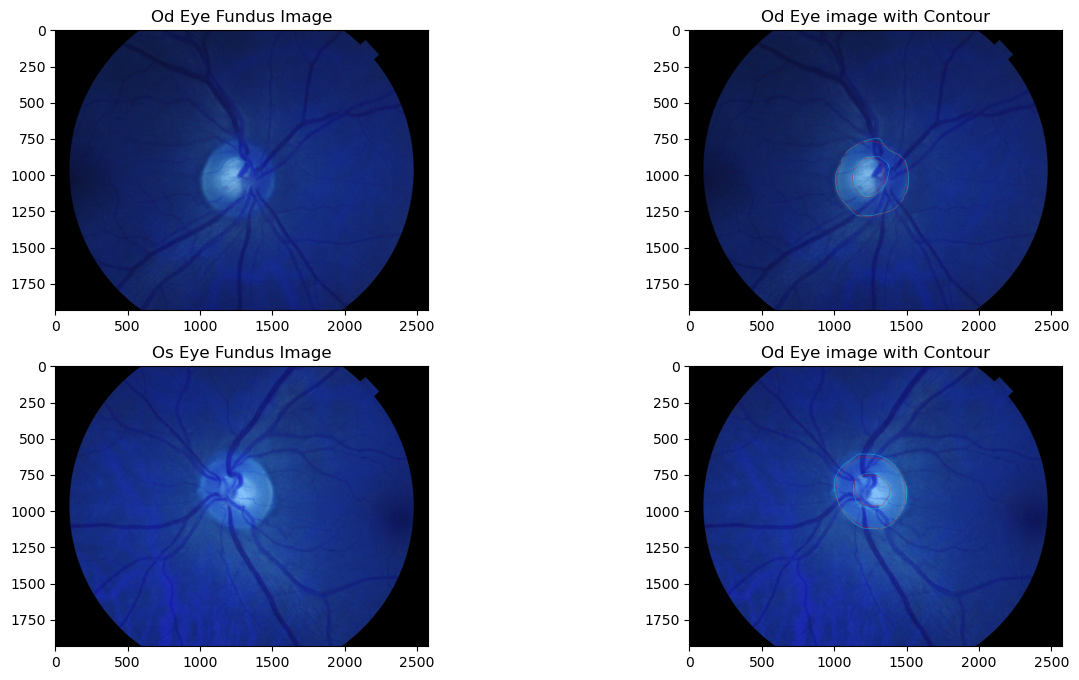

In [34]:
person = db.get(294)
if person != None:
  person.display()